<a href="https://colab.research.google.com/github/itsshln/pr1/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Анализ целевой переменной Y с точки зрения статистики**

In [ ]:
!pip install pandas scikit-learn seaborn scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/diamond.csv')
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


In [ ]:
#вывод всех колонок
for column in df.columns:
  print(f'колонка: {column}')

колонка: Carat Weight
колонка: Cut
колонка: Color
колонка: Clarity
колонка: Polish
колонка: Symmetry
колонка: Report
колонка: Price


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [ ]:
# проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [ ]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'Price'] = np.nan

In [ ]:
# проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           5
dtype: int64


In [ ]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum())


# Удаление строк с пропусками
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [ ]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.Price = df_median.Price.fillna(df_median.Price.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [ ]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.Price = df_mean.Price.fillna(df_median.Price.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет



# Заполнение пропусков средним
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


В качестве целевой переменной взяла переменную is_expensive_diamond, которая была преобразована из Price. Если цена >= 70000, то он считается дорогим бриллиантом.

In [ ]:
df['is_expensive_diamond'] = np.where(df['Price'] >= 70000, 1, 0).astype(int)

In [ ]:
print(df.dtypes)

Carat Weight            float64
Cut                      object
Color                    object
Clarity                  object
Polish                   object
Symmetry                 object
Report                   object
Price                     int64
is_expensive_diamond      int64
dtype: object


In [ ]:
df.columns

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price', 'is_expensive_diamond'],
      dtype='object')

In [ ]:
Y = df['is_expensive_diamond'] # целевая переменная
X = df.drop('is_expensive_diamond', axis=1) # переменные для проверки влияния

X = X.drop('Price', axis=1)

In [ ]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,Carat Weight
0,1.10
1,0.83
2,0.85
3,0.91
4,0.83
...,...
5995,1.03
5996,1.00
5997,1.02
5998,1.27


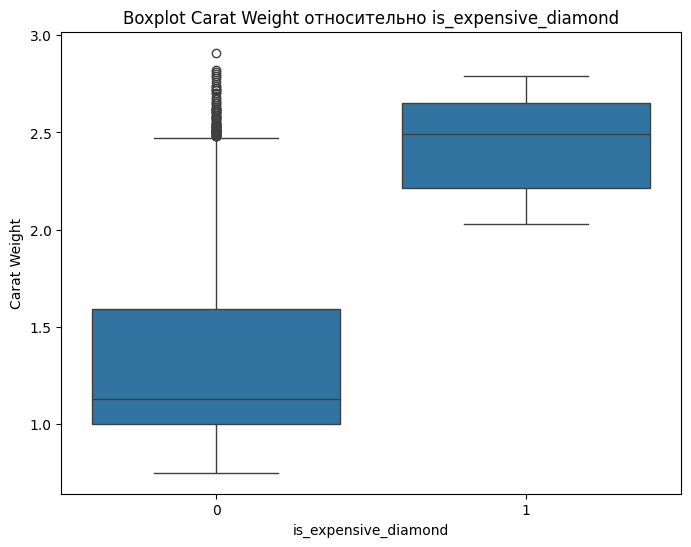

In [ ]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_expensive_diamond', y=col, data=df)
    plt.title(f'Boxplot {col} относительно is_expensive_diamond')
    plt.show()

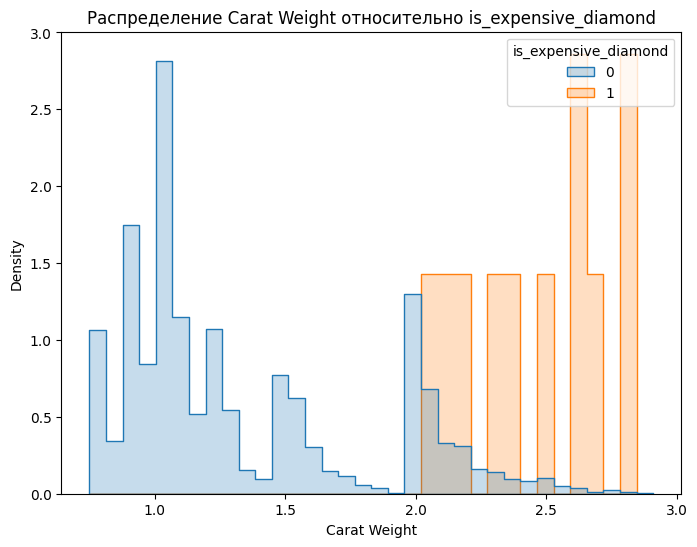

In [ ]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='is_expensive_diamond', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно is_expensive_diamond')
    plt.show()

**Анализ боксплота и диаграмм**

В боксплоте 0 - недорогой бриллиант, а 1 - дорогой бриллиант. По боксплоту Carat Weight видим, что недорогие бриллианты имеют выброс, а диапазон дорогих бриллиантов узкий, это означает, что более тяжелые бриллианты чаще являются дорогими.

В диаграмме 0 - недорогой бриллиант, а 1 - дорогой бриллиант. По диаграмме Carat Weight видим, что большинство недорогих бриллиантов сосредоточены в диапазоне 0.8-1.5 карата, а дорогие бриллианты имеют распределение между 2.4-2.7 карата. Вывод: небольшие и средние бриллианты чаще бывают недорогими, а дорогими бриллиантами считаются бриллианты с весом выше 2 каратов.

In [ ]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('is_expensive_diamond')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('is_expensive_diamond')[df.select_dtypes(include=['object']).columns].describe()


In [ ]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('is_expensive_diamond')[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для Carat Weight:

                       count      mean       std   min    25%   50%   75%  \
is_expensive_diamond                                                        
0                     5989.0  1.332473  0.473594  0.75  1.000  1.13  1.59   
1                       11.0  2.449091  0.273439  2.03  2.215  2.49  2.65   

                       max  
is_expensive_diamond        
0                     2.91  
1                     2.79  




In [ ]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


Cut                     Color                  Clarity  \
                     count unique    top  freq count unique top  freq   count   
is_expensive_diamond                                                            
0                     5989      5  Ideal  2475  5989      6   G  1501    5989   
1                       11      3  Ideal     7    11      1   D    11      11   

                             ... Polish       Symmetry                   \
                     unique  ...    top  freq    count unique top  freq   
is_expensive_diamond         ...                                          
0                         7  ...     EX  2419     5989      4  VG  2416   
1                         4  ...     EX     6       11      3  EX     8   

                     Report                    
                      count unique  top  freq  
is_expensive_diamond                           
0                      5989      2  GIA  5257  
1                        11      2  GIA     9  

[2 rows x 24 columns]

1. Cut:
Ideal: 5989 экземпляров из 11 – это лучший вариант, обеспечивающий максимальный блеск и свечение.

2. Color:
Наиболее распространенный цвет для идеальных бриллиантов – G (1501 экземпляров), что указывает на отсутствие заметного цвета и высокий уровень прозрачности.

3. Clarity:
Максимальное количество бриллиантов имеет оценку SI1 (2059 экземпляров) в характеристике "Неоптимальная чистота", что предполагает некоторые видимые недостатки, однако это не обязательно влияет на красоту камня.

4. Polish:
Многие из идеальных бриллиантов имеют рейтинг EX по полировке (2419 экземпляров), что указывает на высокое качество обработки.

5. Symmetry:
Четверть идеальных бриллиантов имеют оценку VG по симметрии (2416 экземпляра), что также указывает на высокое качество и привлекательность.

6. Report:
Большинство бриллиантов, как идеальных, так и очень хороших, имеют отчет от GIA – 5257 экземпляра, что подтверждает их аутентичность и качество.

Вывод: Бриллианты категории 'ideal' имеют более высокие показатели по всем характеристикам, в то время как другие варианты также остается привлекательным выбором для покупателей, стремящихся к качеству без излишних затрат.

**2. Расчет теста Пирсона**

In [ ]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,Carat Weight,Price,is_expensive_diamond
Carat Weight,1.000000,0.858562,0.100423
Price,0.858562,1.000000,0.292896
is_expensive_diamond,0.100423,0.292896,1.000000


Carat Weight and Price

Коэффициент корреляции : 0,858562

Существует сильная положительная корреляция между весом в каратах и ​​ценой бриллианта. Это означает, что с появлением бриллианта цена также, как правило, увеличивается. Это ожидаемо, поскольку более крупные бриллианты обычно стоят дороже.

Carat Weight and is_expensive_diamond

Коэффициент корреляции : 0,100423

Существует умеренная положительная корреляция между весом в каратах и ​​темой, которая является бриллиантом лучше. Это может свидетельствовать о том, что более крупные бриллианты имеют большие шансы быть классифицированными как лучшие, но это не является строгим правилом.

Price and is_best_diamond

Коэффициент корреляции : 0,292896

Существует умеренная положительная корреляция между ценой и темой, которая является бриллиантом лучше. Это может означать, что более дорогие бриллианты имеют некоторое влияние на то, чтобы быть классифицированными как лучшие, хотя связь не так сильна, как в случае с весом и ценой.

3. Машинное обучение

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']


In [ ]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [ ]:
X_processed

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1.10,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,0.83,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,0.85,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.91,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0.83,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5996,1.00,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
5997,1.02,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5998,1.27,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['Carat Weight']


In [ ]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [ ]:
X_processed

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,0.162037,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,0.037037,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,0.046296,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.074074,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0.037037,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.129630,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5996,0.115741,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
5997,0.125000,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5998,0.240741,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [ ]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9981
Точность на тестовой выборке: 0.9983

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1198
           1       0.00      0.00      0.00         2

    accuracy                           1.00      1200
   macro avg       0.50      0.50      0.50      1200
weighted avg       1.00      1.00      1.00      1200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

                Feature  Coefficient
0          Carat Weight     2.808886
10           Clarity_IF     1.908492
7               Color_G    -1.419734
21          Symmetry_VG    -1.192224
8               Color_H    -1.178847
6               Color_F    -1.115368
9               Color_I    -1.105895
11          Clarity_SI1    -0.962647
13          Clarity_VS2    -0.958815
12          Clarity_VS1    -0.910199
5               Color_E    -0.826475
19           Symmetry_G    -0.639622
2             Cut_Ideal     0.423307
4         Cut_Very Good    -0.421399
3   Cut_Signature-Ideal     0.320846
1              Cut_Good    -0.229567
16             Polish_G    -0.188273
15         Clarity_VVS2    -0.168762
14         Clarity_VVS1     0.122369
17            Polish_ID     0.063573
22           Report_GIA     0.062709
20          Symmetry_ID     0.048854
18            Polish_VG    -0.024034


**4. Построение модели логистической регрессии для предсказания качества брилианта**

4.1 Кросс-валидация модели

In [ ]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.9982
Отклонение точности: 0.0003


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

4.2 Построение ROC-кривой

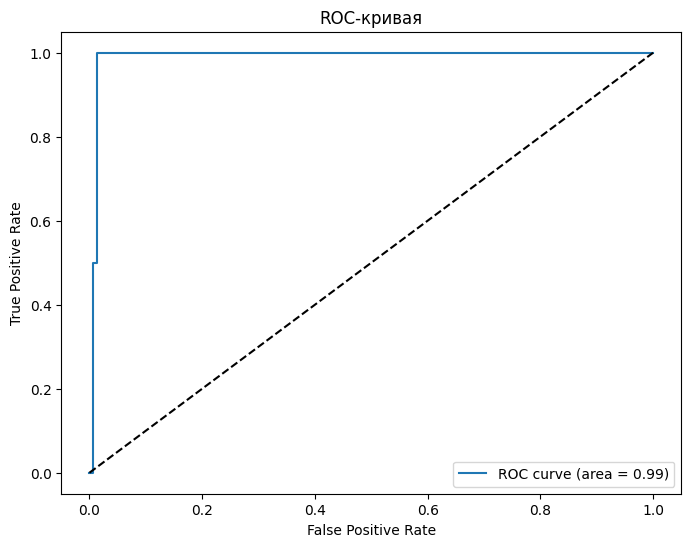

In [ ]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()